In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [65]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [66]:
df = pd.read_csv('./datasets/irrigation_dataset.csv')
print('Data loaded successfully.')
print(f'Dataset dimensions: {df.shape[0]} rows x {df.shape[1]} columns')

Data loaded successfully.
Dataset dimensions: 299 rows x 3 columns


In [67]:
print('First 10 rows of the dataset:')
display(df.head(10))

First 10 rows of the dataset:


,Irrigation Hours,Irrigated Area,Irrigated Area by Angle
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [68]:
print('Information about the dataset:')
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Irrigation Hours         299 non-null    int64  
 1   Irrigated Area           299 non-null    int64  
 2   Irrigated Area by Angle  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [69]:
print('Missing values by column:')
print(df.isnull().sum())
print(f'\nTotal number of missing values: {df.isnull().sum().sum()}')

Missing values by column:
Irrigation Hours           0
Irrigated Area             0
Irrigated Area by Angle    0
dtype: int64

Total number of missing values: 0


In [70]:
print('Descriptive Statistics of the Variables:')
display(df.describe())

Descriptive Statistics of the Variables:


,Irrigation Hours,Irrigated Area,Irrigated Area by Angle
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


In [71]:
print("Additional Statistics:")
for col in df.columns:
  print(f"\n{col}:")
  print(f" - Average: {df[col].mean():.2f}")
  print(f" - Median: {df[col].median():.2f}")
  print(f" - Standard Deviation: {df[col].std():.2f}")
  print(f" - Variance: {df[col].var():.2f}")
  print(f" - Minimum: {df[col].min():.2f}")
  print(f" - Maximum: {df[col].max():.2f}")
  print(f" - Range: {df[col].max() - df[col].min():.2f}")

Additional Statistics:

Irrigation Hours:
 - Average: 150.00
 - Median: 150.00
 - Standard Deviation: 86.46
 - Variance: 7475.00
 - Minimum: 1.00
 - Maximum: 299.00
 - Range: 298.00

Irrigated Area:
 - Average: 15000.00
 - Median: 15000.00
 - Standard Deviation: 8645.81
 - Variance: 74750000.00
 - Minimum: 100.00
 - Maximum: 29900.00
 - Range: 29800.00

Irrigated Area by Angle:
 - Average: 10000.00
 - Median: 10000.00
 - Standard Deviation: 5763.87
 - Variance: 33222222.22
 - Minimum: 66.67
 - Maximum: 19933.33
 - Range: 19866.67


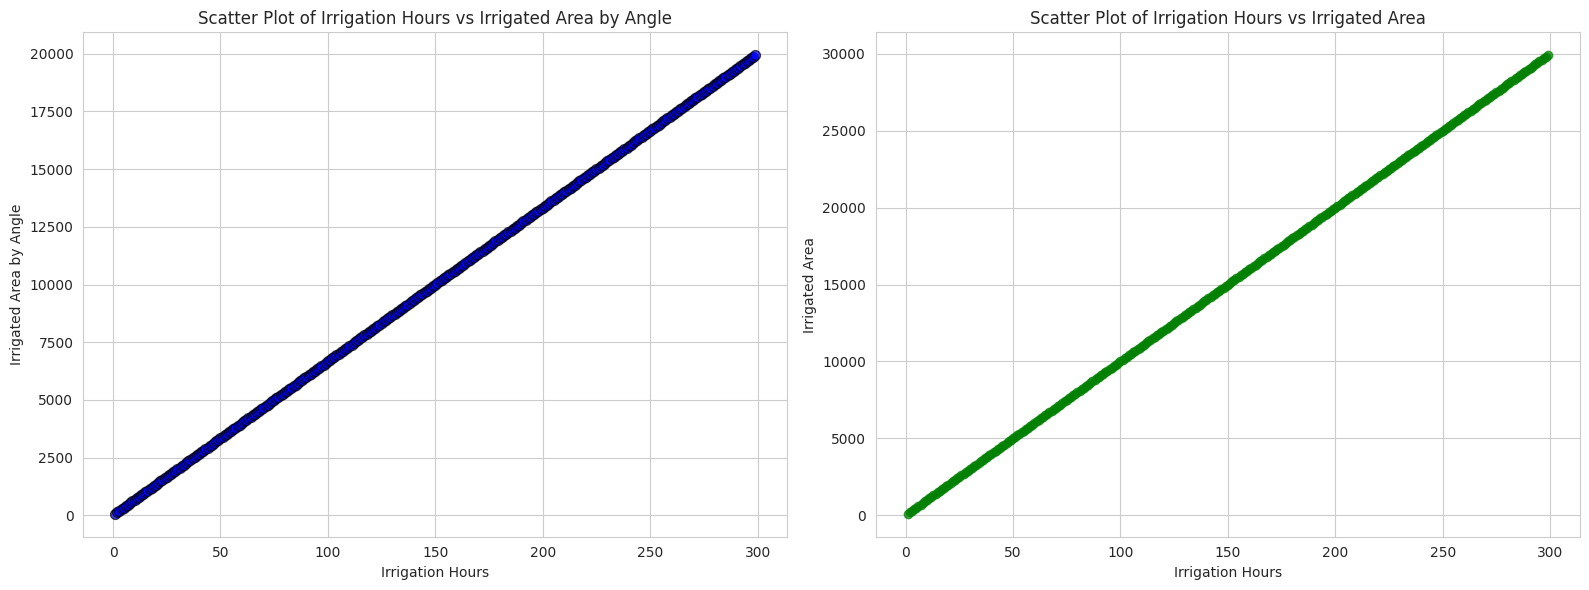

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['Irrigation Hours'], df['Irrigated Area by Angle'], alpha=0.7, color='blue', edgecolors='black', s=50)
axes[0].set_xlabel('Irrigation Hours')
axes[0].set_ylabel('Irrigated Area by Angle')
axes[0].set_title('Scatter Plot of Irrigation Hours vs Irrigated Area by Angle')
axes[0].grid(True)

axes[1].scatter(df['Irrigation Hours'], df['Irrigated Area'], alpha=0.7, color='green')
axes[1].set_xlabel('Irrigation Hours')
axes[1].set_ylabel('Irrigated Area')
axes[1].set_title('Scatter Plot of Irrigation Hours vs Irrigated Area')
axes[1].grid(True)

plt.tight_layout()
plt.show()


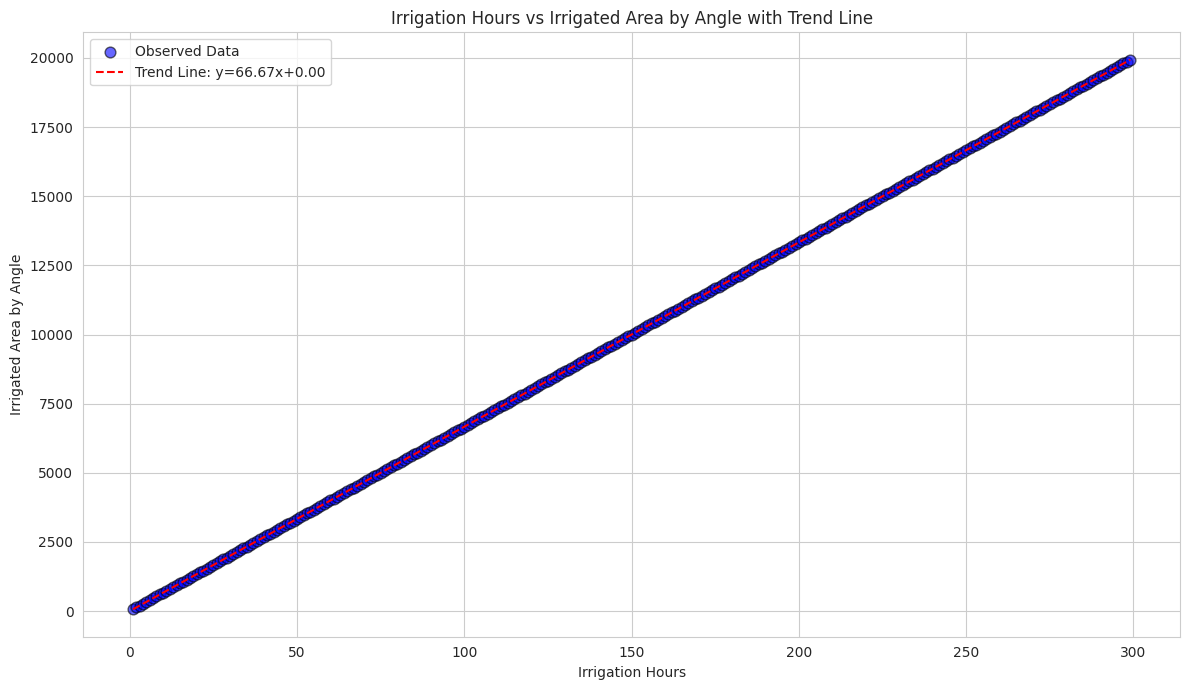

In [73]:
plt.figure(figsize=(12, 7))
plt.scatter(df['Irrigation Hours'], df['Irrigated Area by Angle'], color='blue', alpha=0.6, edgecolors='black', s=60, label='Observed Data')

z = np.polyfit(df['Irrigation Hours'], df['Irrigated Area by Angle'], 1)
p = np.poly1d(z)
plt.plot(df['Irrigation Hours'], p(df['Irrigation Hours']), "r--", label=f'Trend Line: y={z[0]:.2f}x+{z[1]:.2f}')

plt.xlabel('Irrigation Hours')
plt.ylabel('Irrigated Area by Angle')
plt.title('Irrigation Hours vs Irrigated Area by Angle with Trend Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation Matrix:

                         Irrigation Hours  Irrigated Area  \
Irrigation Hours                      1.0             1.0   
Irrigated Area                        1.0             1.0   
Irrigated Area by Angle               1.0             1.0   

                         Irrigated Area by Angle  
Irrigation Hours                             1.0  
Irrigated Area                               1.0  
Irrigated Area by Angle                      1.0  


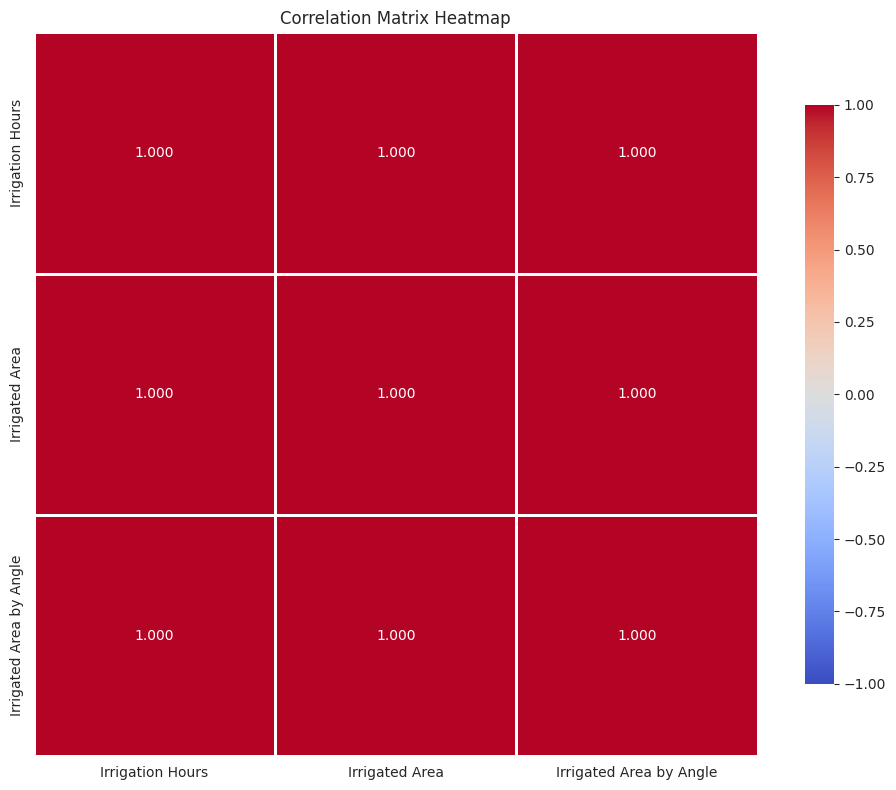

Detailed Correlation Analysis:
Correlation between "Irrigation Hours" and "Area Irrigated by Angle": 1.000000
Correlation between "Irrigation Hours" and "Area Irrigated": 1.000000
Correlation between "Area Irrigated" and "Area Irrigated by Angle": 1.000000

Interpretation: Values close to 1 indicate a strong positive correlation!


In [74]:
correlation_matrix = df.corr()

print('Correlation Matrix:\n')
print(correlation_matrix)

plt.figure(figsize=(10, 8))

sns.heatmap(
  correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True,
  linewidths=2, cbar_kws={"shrink": 0.8}, fmt='.3f', vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print('Detailed Correlation Analysis:')
print(f'Correlation between "Irrigation Hours" and "Area Irrigated by Angle": {correlation_matrix.loc['Irrigation Hours', 'Irrigated Area by Angle']:.6f}')
print(f'Correlation between "Irrigation Hours" and "Area Irrigated": {correlation_matrix.loc['Irrigation Hours', 'Irrigated Area']:.6f}')
print(f'Correlation between "Area Irrigated" and "Area Irrigated by Angle": {correlation_matrix.loc['Irrigated Area', 'Irrigated Area by Angle']:.6f}')

print('\nInterpretation: Values close to 1 indicate a strong positive correlation!')

In [75]:
X = df[['Irrigation Hours']]
y = df['Irrigated Area by Angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set:")
print(f"  X_train: {X_train.shape[0]} samples")
print(f"  y_train: {y_train.shape[0]} samples")
print(f"\nTest Set:")
print(f"  X_test: {X_test.shape[0]} samples")
print(f"  y_test: {y_test.shape[0]} samples")
print(f"\nTraining/Test Split Ratio: {len(X_train)/len(X)*100:.0f}% / {len(X_test)/len(X)*100:.0f}%")

Training Set:
  X_train: 239 samples
  y_train: 239 samples

Test Set:
  X_test: 60 samples
  y_test: 60 samples

Training/Test Split Ratio: 80% / 20%


In [76]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Model training completed.')

Model training completed.


In [77]:
slope = model.coef_[0]
intercept = model.intercept_

print('EQUATION OF THE LINE IN THE MODEL:')
print(f"\n  Y = {slope:.4f} * X + {intercept:.4f}")
print(f"\n  Irrigated Area by Angle = {slope:.4f} * Irrigation Hours + {intercept:.4f}")

print("\nInterpretation:")
print(f"  - Slope (a): {slope:.4f}")
print(f"    → For each additional hour of irrigation, the irrigated area by angle increases by {slope:.4f} m²")
print(f"\n  - Intercept (b): {intercept:.4f}")
print(f"    → When the irrigation hours are 0, the irrigated area by angle is {intercept:.4f} m²")

EQUATION OF THE LINE IN THE MODEL:

  Y = 66.6667 * X + 0.0000

  Irrigated Area by Angle = 66.6667 * Irrigation Hours + 0.0000

Interpretation:
  - Slope (a): 66.6667
    → For each additional hour of irrigation, the irrigated area by angle increases by 66.6667 m²

  - Intercept (b): 0.0000
    → When the irrigation hours are 0, the irrigated area by angle is 0.0000 m²


In [78]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("MODEL EVALUATION METRICS:")
print("\nTraining Set:")
print(f"  R² Score: {r2_train:.6f}")
print(f"  MSE (Mean Squared Error): {mse_train:.6f}")
print(f"  RMSE (Root Mean Squared Error): {rmse_train:.6f}")
print(f"  MAE (Mean Absolute Error): {mae_train:.6f}")

print("\nTest Set:")
print(f"  R² Score: {r2_test:.6f}")
print(f"  MSE (Mean Squared Error): {mse_test:.6f}")
print(f"  RMSE (Root Mean Squared Error): {rmse_test:.6f}")
print(f"  MAE (Mean Absolute Error): {mae_test:.6f}")

print("\n Interpretation of the R² Score:")
print(f"   The model explains {r2_test*100:.4f}% of the variability in the test data")

MODEL EVALUATION METRICS:

Training Set:
  R² Score: 1.000000
  MSE (Mean Squared Error): 0.000000
  RMSE (Root Mean Squared Error): 0.000000
  MAE (Mean Absolute Error): 0.000000

Test Set:
  R² Score: 1.000000
  MSE (Mean Squared Error): 0.000000
  RMSE (Root Mean Squared Error): 0.000000
  MAE (Mean Absolute Error): 0.000000

 Interpretation of the R² Score:
   The model explains 100.0000% of the variability in the test data


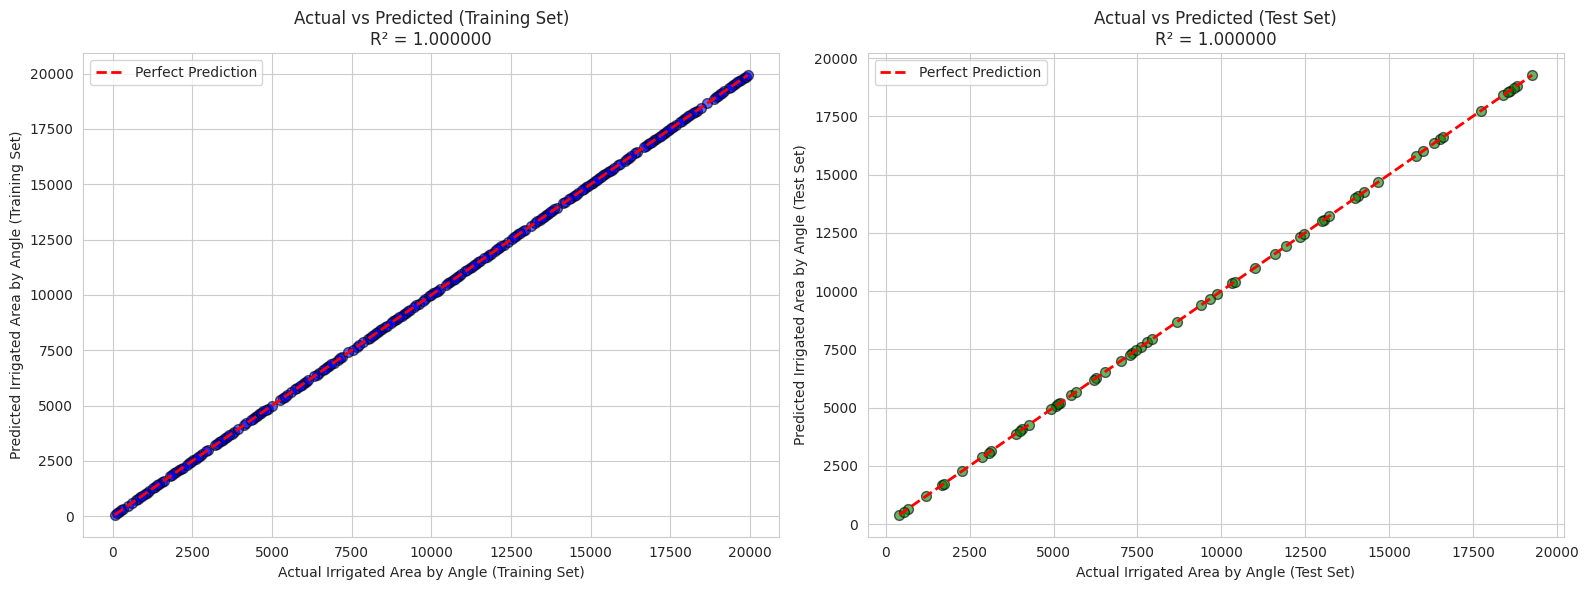

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', edgecolors='black', s=50)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Irrigated Area by Angle (Training Set)')
axes[0].set_ylabel('Predicted Irrigated Area by Angle (Training Set)')
axes[0].set_title(f'Actual vs Predicted (Training Set)\nR² = {r2_train:.6f}')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(y_test, y_pred_test, alpha=0.6, color='green', edgecolors='black', s=50)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Irrigated Area by Angle (Test Set)')
axes[1].set_ylabel('Predicted Irrigated Area by Angle (Test Set)')
axes[1].set_title(f'Actual vs Predicted (Test Set)\nR² = {r2_test:.6f}')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [80]:
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

print('WASTE STATISTICS:')
print('\nTraining Set:')
print(f'  Average Residual: {residual_train.mean():.10f}')
print(f'  Standard Deviation: {residual_train.std():.6f}')
print(f'  Minimum: {residual_train.min():.6f}')
print(f'  Maximum: {residual_train.max():.6f}')

print('\nTest Set:')
print(f'  Average Residual: {residual_test.mean():.10f}')
print(f'  Standard Deviation: {residual_test.std():.6f}')
print(f'  Minimum: {residual_test.min():.6f}')
print(f'  Maximum: {residual_test.max():.6f}')

WASTE STATISTICS:

Training Set:
  Average Residual: -0.0000000000
  Standard Deviation: 0.000000
  Minimum: -0.000000
  Maximum: 0.000000

Test Set:
  Average Residual: -0.0000000000
  Standard Deviation: 0.000000
  Minimum: -0.000000
  Maximum: 0.000000


In [81]:
statistic_train, p_value_train = stats.shapiro(residual_train)
statistic_test, p_value_test = stats.shapiro(residual_test)

print('Shapiro-Wilk Normality Test for Residual:')

print('\nTraining Set:')
print(f'  Test Statistic: {statistic_train:.6f}')
print(f'  p-value: {p_value_train:.6f}')
if p_value_train > 0.05:
  print('  Conclusion: Fail to reject the null hypothesis - Residual is normally distributed.')
else:
  print('  Conclusion: Reject the null hypothesis - Residual is not normally distributed.')

print('\nTest Set:')
print(f'  Test Statistic: {statistic_test:.6f}')
print(f'  p-value: {p_value_test:.6f}')
if p_value_test > 0.05:
  print('  Conclusion: Fail to reject the null hypothesis - Residual is normally distributed.')
else:
  print('  Conclusion: Reject the null hypothesis - Residual is not normally distributed.')

Shapiro-Wilk Normality Test for Residual:

Training Set:
  Test Statistic: 0.790962
  p-value: 0.000000
  Conclusion: Reject the null hypothesis - Residual is not normally distributed.

Test Set:
  Test Statistic: 0.825779
  p-value: 0.000001
  Conclusion: Reject the null hypothesis - Residual is not normally distributed.


In [82]:
ks_statistic_train, ks_p_value_train = stats.kstest(
  residual_train, 'norm', args=(residual_train.mean(), residual_train.std()))
ks_statistic_test, ks_p_value_test = stats.kstest(
  residual_test, 'norm', args=(residual_test.mean(), residual_test.std()))

print('Kolmogorov-Smirnov Normality Test for Residual:')
print('\nTraining Set:')
print(f'  Test Statistic: {ks_statistic_train:.6f}')
print(f'  p-value: {ks_p_value_train:.6f}')
print('\nTest Set:')
print(f'  Test Statistic: {ks_statistic_test:.6f}')
print(f'  p-value: {ks_p_value_test:.6f}')

Kolmogorov-Smirnov Normality Test for Residual:

Training Set:
  Test Statistic: 0.236512
  p-value: 0.000000

Test Set:
  Test Statistic: 0.219665
  p-value: 0.005056


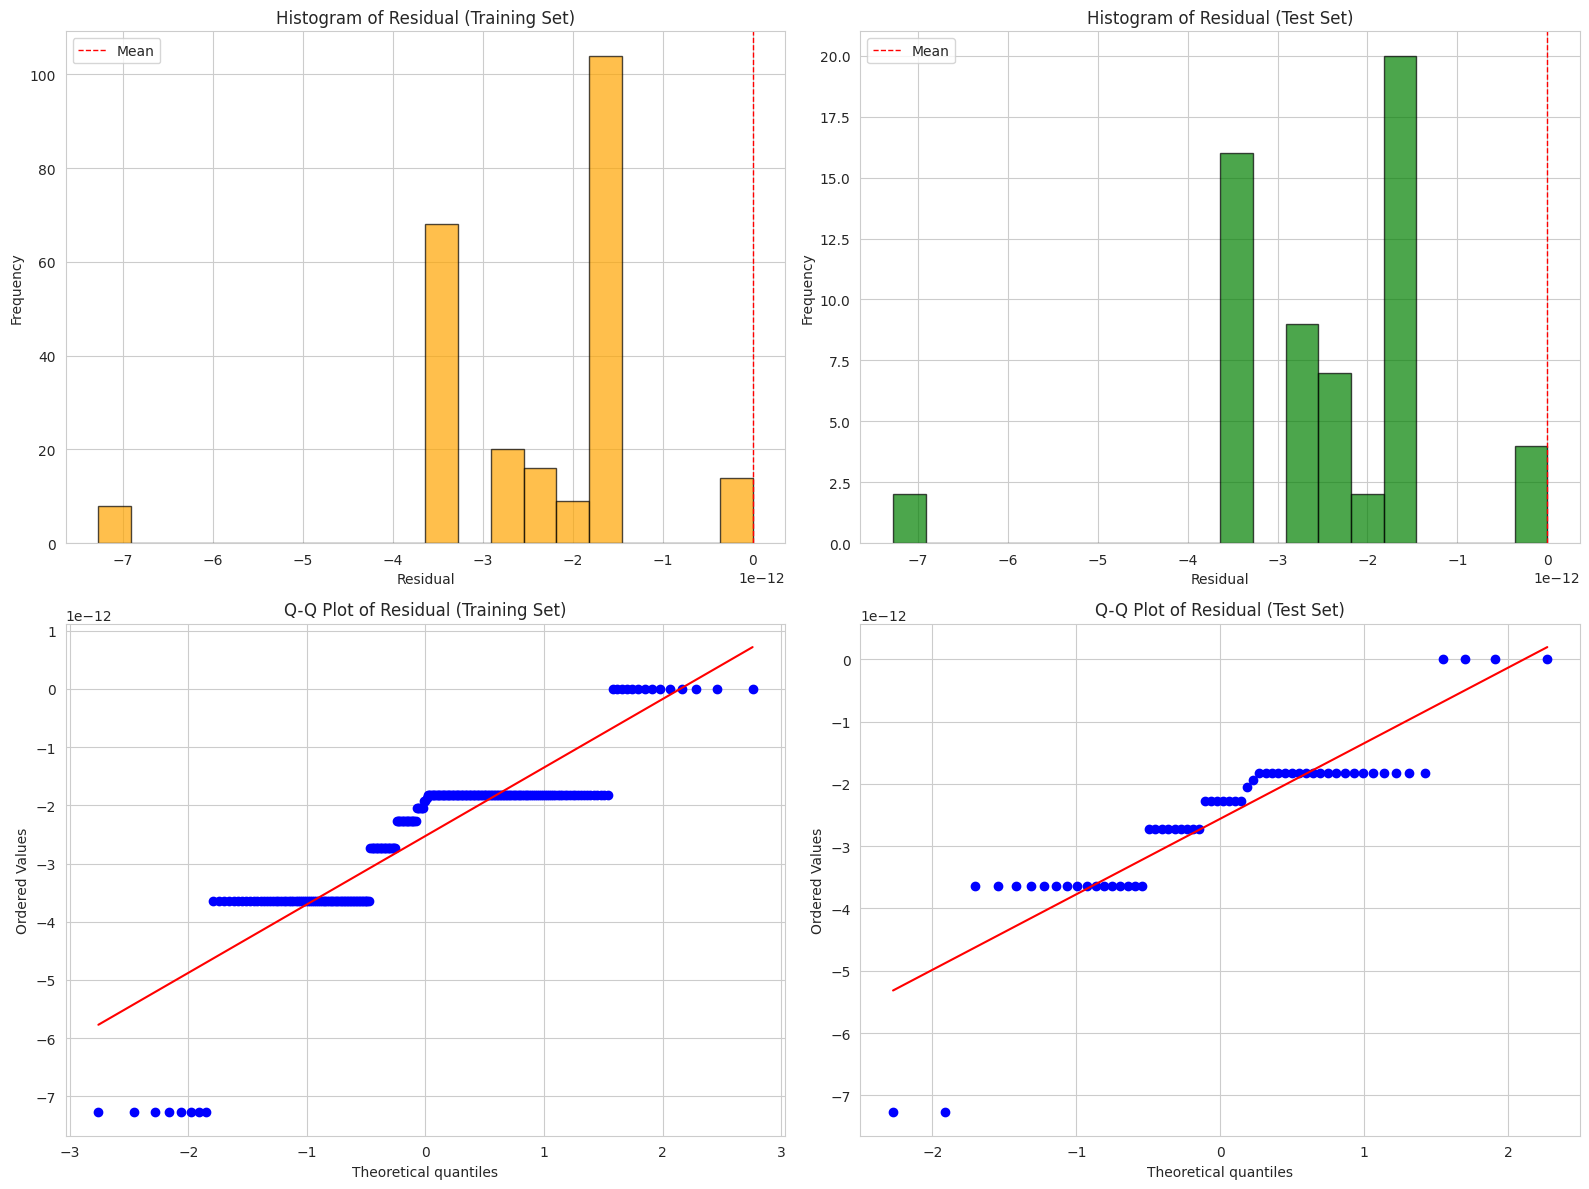


Interpretation of the Graphs:
   - Histogram: The residuals should follow an approximately normal distribution.
   - Q-Q Plot: The points should be close to the diagonal line to indicate normality.


In [85]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(residual_train, bins=20, color='orange', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Histogram of Residual (Training Set)')
axes[0, 0].set_xlabel('Residual')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(0, color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].hist(residual_test, bins=20, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Histogram of Residual (Test Set)')
axes[0, 1].set_xlabel('Residual')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(0, color='red', linestyle='dashed', linewidth=1, label='Mean')
axes[0, 1].legend()
axes[0, 1].grid(True)

stats.probplot(residual_train, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Residual (Training Set)')
axes[1, 0].grid(True)

stats.probplot(residual_test, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residual (Test Set)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

print("\nInterpretation of the Graphs:")
print("   - Histogram: The residuals should follow an approximately normal distribution.")
print("   - Q-Q Plot: The points should be close to the diagonal line to indicate normality.")

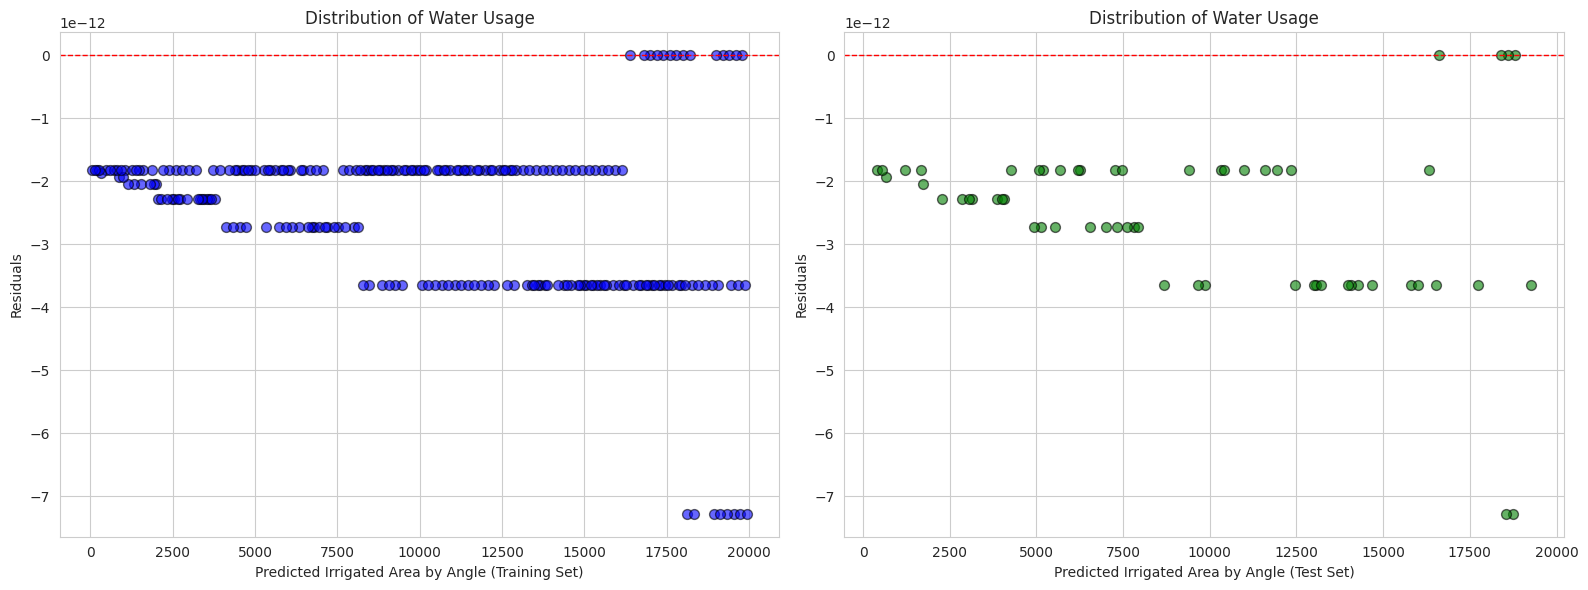

The residuals should be randomly distributed around zero, with no visible patterns.


In [88]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(y_pred_train, residual_train, alpha=0.6, color='blue', edgecolors='black', s=50)
axes[0].axhline(0, color='red', linestyle='dashed', linewidth=1)
axes[0].set_xlabel('Predicted Irrigated Area by Angle (Training Set)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Distribution of Water Usage')
axes[0].grid(True)

axes[1].scatter(y_pred_test, residual_test, alpha=0.6, color='green', edgecolors='black', s=50)
axes[1].axhline(0, color='red', linestyle='dashed', linewidth=1)
axes[1].set_xlabel('Predicted Irrigated Area by Angle (Test Set)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Distribution of Water Usage')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print('The residuals should be randomly distributed around zero, with no visible patterns.')

In [89]:
example_hours = 15
predicted_area = model.predict(np.array([[example_hours]]))

print('PREDICTION EXAMPLE:')
print(f'  For {example_hours} hours of irrigation, the predicted irrigated area by angle is {predicted_area[0]:.4f} m²')

manual_area = slope * example_hours + intercept
print(f'\nEquation Verification: {manual_area:.4f} m² (manual calculation) vs {predicted_area[0]:.4f} m² (model prediction)')
print(f'\nUsed equation: Y = {slope:.4f} * {example_hours} + {intercept:.4f}')

PREDICTION EXAMPLE:
  For 15 hours of irrigation, the predicted irrigated area by angle is 1000.0000 m²

Equation Verification: 1000.0000 m² (manual calculation) vs 1000.0000 m² (model prediction)

Used equation: Y = 66.6667 * 15 + 0.0000


In [93]:
test_hours = [5, 10, 15, 20, 25, 30, 50, 75, 100]
predictions = model.predict([[h] for h in test_hours])

print('Predictions for different irrigation hours values:')
print(f'\n{'Irrigation Hours':<25} {'Predicted Area (m²)':<25}')

for hours, area in zip(test_hours, predictions):
  print(f'{hours:<25} {area:<25}')

df_predictions = pd.DataFrame({
  'Irrigation Hours': test_hours,
  'Predicted Irrigated Area by Angle': predictions.flatten()
})

print('\nPredictions DataFrame:')
display(df_predictions)


Predictions for different irrigation hours values:

Irrigation Hours          Predicted Area (m²)      
5                         333.3333333333352        
10                        666.6666666666686        
15                        1000.0000000000019       
20                        1333.3333333333353       
25                        1666.6666666666686       
30                        2000.000000000002        
50                        3333.3333333333353       
75                        5000.000000000002        
100                       6666.666666666669        

Predictions DataFrame:


,Irrigation Hours,Predicted Irrigated Area by Angle
0,5,333.333333
1,10,666.666667
2,15,1000.000000
3,20,1333.333333
4,25,1666.666667
5,30,2000.000000
6,50,3333.333333
7,75,5000.000000
8,100,6666.666667


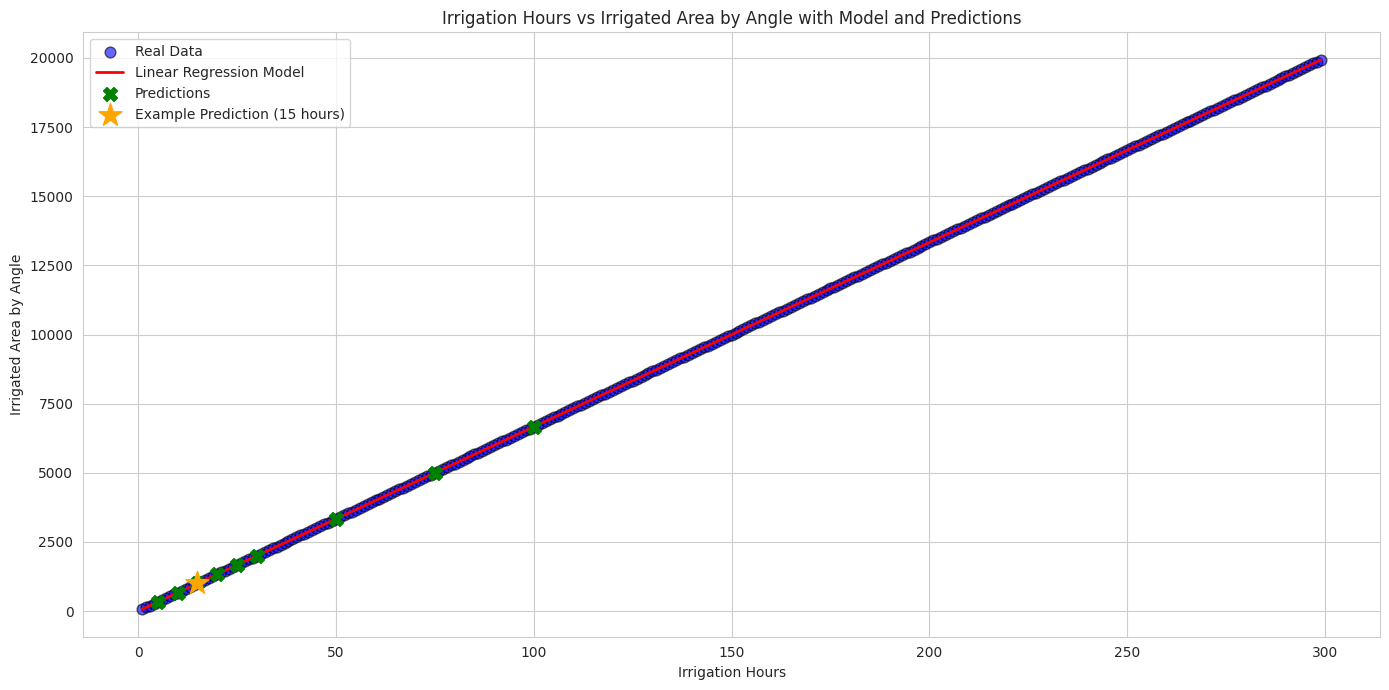

In [95]:
plt.figure(figsize=(14, 7))

plt.scatter(
  df['Irrigation Hours'], df['Irrigated Area by Angle'], color='blue',
  alpha=0.6, edgecolors='black', s=60, label='Real Data')

x_line = np.linspace(df['Irrigation Hours'].min(), df['Irrigation Hours'].max(), 100)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, '-r', color='red', linewidth=2, label='Linear Regression Model')

plt.scatter(test_hours, predictions, color='green', s=100, marker='X', label='Predictions', zorder=5)

plt.scatter([15], [predicted_area], color='orange', s=300, marker='*', label='Example Prediction (15 hours)', zorder=6)

plt.xlabel('Irrigation Hours')
plt.ylabel('Irrigated Area by Angle')
plt.title('Irrigation Hours vs Irrigated Area by Angle with Model and Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
print('FINAL SUMMARY OF THE AGRICULTURAL IRRIGATION ANALYSIS SYSTEM')

print("\nDATA:")
print(f"  • Total records: {len(df)}")
print(f"  • Variables analyzed: {len(df.columns)}")
print(f"  • Hours period: {df['Irrigation Hours'].min()} to {df['Irrigation Hours'].max()} hours")
print("\nMODEL:")
print(f"  • Type: Linear Regression")
print(f"  • Equation: Y = {slope:.4f} * X + {intercept:.4f}")
print(f"  • R² (Training): {r2_train:.6f}")
print(f"  • R² (Testing): {r2_test:.6f}")
print(f"  • RMSE (Testing): {rmse_test:.6f}")
print("\nCORRELATIONS:")
print(f"  • Irrigation Hours vs Area by Angle: {correlation_matrix.loc['Irrigation Hours', 'Irrigated Area by Angle']:.6f}")
print(f"  • Irrigation Hours vs Total Area: {correlation_matrix.loc['Irrigation Hours', 'Irrigated Area']:.6f}")
print("\nNORMALITY TESTS:")
print(f"  • Shapiro-Wilk (Training): p-value = {p_value_train:.6f}")
print(f"  • Shapiro-Wilk (Testing): p-value = {p_value_test:.6f}")
print("\nINTERPRETATION:")
print(f"  • The model presents excellent fit to the data (R² ≈ {r2_test:.4f})")
print(f"  • There is a perfect linear correlation between irrigation hours and irrigated area")
print(f"  • For each additional hour of irrigation, the area increases by approximately {slope:.2f} m²")

print("\n" + "="*80)
print("✓ ANALYSIS SUCCESSFULLY COMPLETED!")
print("="*80)

FINAL SUMMARY OF THE AGRICULTURAL IRRIGATION ANALYSIS SYSTEM

DATA:
  • Total records: 299
  • Variables analyzed: 3
  • Hours period: 1 to 299 hours

MODEL:
  • Type: Linear Regression
  • Equation: Y = 66.6667 * X + 0.0000
  • R² (Training): 1.000000
  • R² (Testing): 1.000000
  • RMSE (Testing): 0.000000

CORRELATIONS:
  • Irrigation Hours vs Area by Angle: 1.000000
  • Irrigation Hours vs Total Area: 1.000000

NORMALITY TESTS:
  • Shapiro-Wilk (Training): p-value = 0.000000
  • Shapiro-Wilk (Testing): p-value = 0.000001

INTERPRETATION:
  • The model presents excellent fit to the data (R² ≈ 1.0000)
  • There is a perfect linear correlation between irrigation hours and irrigated area
  • For each additional hour of irrigation, the area increases by approximately 66.67 m²

✓ COMPLETE ANALYSIS SUCCESSFULLY COMPLETED!
